In [5]:
import os
from pathlib import Path
import json

In [102]:
root = Path(os.getcwd())
data_dir = root.joinpath('data')
tiny_twitter_dir = data_dir.joinpath('tinyTwitter.json')
small_twitter_dir = data_dir.joinpath('smallTwitter.json')
grid_dir = data_dir.joinpath('sydGrid.json')

In [103]:
f = open(small_twitter_dir)
tweets = json.load(f)
f.close()

In [104]:
tweets.keys()

dict_keys(['total_rows', 'rows'])

In [17]:
tweets['total_rows']

1000

In [105]:
tweets['rows'][0].keys()

dict_keys(['id', 'key', 'value', 'doc'])

<AxesSubplot:>

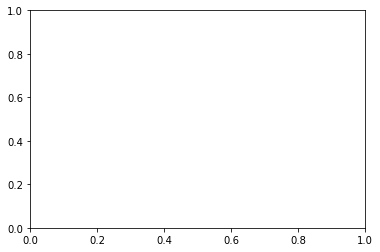

In [119]:
import numpy as np
import seaborn as sns

import typing

class Tweet():
  """Convenience class for tweets"""
  def __init__(self, tweet: dict):
    self.data = tweet
  def get_location(self) -> typing.Optional[str]:
    if location := self.data['doc']['coordinates']:
      location = location['coordinates']
      return Point(location)
    return None
  def get_language(self) -> typing.Optional[str]:
    if language := self.data['doc']['lang']:
      return language
    return None
  

for i, tweet in enumerate(tweets['rows']):
  x = []
  y = []
  t = Tweet(tweet)
  if t.get_location():
    loc = t.get_location()
    x.append(loc.x)
    y.append(loc.y)
    
sns.scatterplot(x=x, y=y)
    

In [115]:
y

[]

In [29]:
tweets['rows'][0]

{'id': '1212161512334336000',
 'key': ['sydney', 2020, 1, 1],
 'value': 1,
 'doc': {'_id': '1212161512334336000',
  '_rev': '1-a51c37b5a85cf6a96735628afbea2c75',
  'created_at': 'Wed Jan 01 00:00:00 +0000 2020',
  'id': 1212161512334336000,
  'id_str': '1212161512334336000',
  'text': '@La_Doine Pues ahora si, feliz 2020 🎊',
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'screen_name': 'La_Doine',
     'name': 'Star',
     'id': 320174862,
     'id_str': '320174862',
     'indices': [0, 9]}],
   'urls': []},
  'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
  'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
  'in_reply_to_status_id': 1212157896512942000,
  'in_reply_to_status_id_str': '1212157896512942080',
  'in_reply_to_user_id': 320174862,
  'in_reply_to_user_id_str': '320174862',
  'in_reply_to_screen_name': 'La_Doine',
  'user': {'id': 1011510954406961200,
   'id_str': '101151095440

In [39]:
f = open(grid_dir)
grid = json.load(f)
f.close()

In [40]:
polygons = grid['features']

In [58]:
from shapely.geometry import Polygon, Point, MultiPolygon

In [62]:
areas = [Polygon(polygon['geometry']['coordinates'][0]) for polygon in polygons]
multi = MultiPolygon(areas)

In [70]:
for i, poly in enumerate(multi):
  print(i, poly.bounds)

0 (149.79255080532937, -33.31644989181766, 150.34255080532938, -32.81644989181766)
1 (149.79255080532937, -33.81644989181766, 150.34255080532938, -33.31644989181766)
2 (149.79255080532937, -34.31644989181766, 150.34255080532938, -33.81644989181766)
3 (149.79255080532937, -34.81644989181766, 150.34255080532938, -34.31644989181766)
4 (150.34255080532938, -33.31644989181766, 150.8925508053294, -32.81644989181766)
5 (150.34255080532938, -33.81644989181766, 150.8925508053294, -33.31644989181766)
6 (150.34255080532938, -34.31644989181766, 150.8925508053294, -33.81644989181766)
7 (150.34255080532938, -34.81644989181766, 150.8925508053294, -34.31644989181766)
8 (150.89255080532936, -33.31644989181766, 151.44255080532938, -32.81644989181766)
9 (150.89255080532936, -33.81644989181766, 151.44255080532938, -33.31644989181766)
10 (150.89255080532936, -34.31644989181766, 151.44255080532938, -33.81644989181766)
11 (150.89255080532936, -34.81644989181766, 151.44255080532938, -34.31644989181766)
12 (15

In [72]:
list(enumerate(multi))

[(0, <shapely.geometry.polygon.Polygon at 0x117692850>),
 (1, <shapely.geometry.polygon.Polygon at 0x117692190>),
 (2, <shapely.geometry.polygon.Polygon at 0x117692fd0>),
 (3, <shapely.geometry.polygon.Polygon at 0x117692880>),
 (4, <shapely.geometry.polygon.Polygon at 0x1176925e0>),
 (5, <shapely.geometry.polygon.Polygon at 0x117692af0>),
 (6, <shapely.geometry.polygon.Polygon at 0x117692310>),
 (7, <shapely.geometry.polygon.Polygon at 0x1176924f0>),
 (8, <shapely.geometry.polygon.Polygon at 0x1072149d0>),
 (9, <shapely.geometry.polygon.Polygon at 0x117692c10>),
 (10, <shapely.geometry.polygon.Polygon at 0x117692970>),
 (11, <shapely.geometry.polygon.Polygon at 0x117692d30>),
 (12, <shapely.geometry.polygon.Polygon at 0x117692550>),
 (13, <shapely.geometry.polygon.Polygon at 0x117692a90>),
 (14, <shapely.geometry.polygon.Polygon at 0x1176927f0>),
 (15, <shapely.geometry.polygon.Polygon at 0x1176923a0>)]

In [75]:
sorted_multi = sorted(multi, key=lambda poly: (poly.bounds[0], poly.bounds[1]))
for i, poly in enumerate(sorted_multi):
  print(i, poly.bounds)

0 (149.79255080532937, -34.81644989181766, 150.34255080532938, -34.31644989181766)
1 (149.79255080532937, -34.31644989181766, 150.34255080532938, -33.81644989181766)
2 (149.79255080532937, -33.81644989181766, 150.34255080532938, -33.31644989181766)
3 (149.79255080532937, -33.31644989181766, 150.34255080532938, -32.81644989181766)
4 (150.34255080532938, -34.81644989181766, 150.8925508053294, -34.31644989181766)
5 (150.34255080532938, -34.31644989181766, 150.8925508053294, -33.81644989181766)
6 (150.34255080532938, -33.81644989181766, 150.8925508053294, -33.31644989181766)
7 (150.34255080532938, -33.31644989181766, 150.8925508053294, -32.81644989181766)
8 (150.89255080532936, -34.81644989181766, 151.44255080532938, -34.31644989181766)
9 (150.89255080532936, -34.31644989181766, 151.44255080532938, -33.81644989181766)
10 (150.89255080532936, -33.81644989181766, 151.44255080532938, -33.31644989181766)
11 (150.89255080532936, -33.31644989181766, 151.44255080532938, -32.81644989181766)
12 (15

In [82]:
sorted_multi = MultiPolygon(sorted_multi)

In [84]:
type(multi[0])

shapely.geometry.polygon.Polygon

In [86]:
sorted_multi[0].contains(multi[0])

False

In [89]:
sorted(list(enumerate(multi)), key=lambda pair: (pair[1].bounds[0], pair[1].bounds[1]))

[(3, <shapely.geometry.polygon.Polygon at 0x122fbc1c0>),
 (2, <shapely.geometry.polygon.Polygon at 0x122fbc1f0>),
 (1, <shapely.geometry.polygon.Polygon at 0x122fbca30>),
 (0, <shapely.geometry.polygon.Polygon at 0x122f6a0a0>),
 (7, <shapely.geometry.polygon.Polygon at 0x122fbc8b0>),
 (6, <shapely.geometry.polygon.Polygon at 0x122fbc160>),
 (5, <shapely.geometry.polygon.Polygon at 0x122fbc100>),
 (4, <shapely.geometry.polygon.Polygon at 0x122fbc3a0>),
 (11, <shapely.geometry.polygon.Polygon at 0x122fbc4c0>),
 (10, <shapely.geometry.polygon.Polygon at 0x122fbc3d0>),
 (9, <shapely.geometry.polygon.Polygon at 0x122fbc250>),
 (8, <shapely.geometry.polygon.Polygon at 0x122fbc910>),
 (15, <shapely.geometry.polygon.Polygon at 0x122fbc280>),
 (14, <shapely.geometry.polygon.Polygon at 0x122fbc460>),
 (13, <shapely.geometry.polygon.Polygon at 0x122fbc2b0>),
 (12, <shapely.geometry.polygon.Polygon at 0x122fbc4f0>)]